In [ ]:
from google.colab import files
uploaded = files.upload()



Saving cleaned_creditscore_dataset.csv to cleaned_creditscore_dataset.csv


In [ ]:
import zipfile
import os

# Step 1: Unzip the file
with zipfile.ZipFile('cleaned-credit-score-datase.zip', 'r') as zip_ref:
    zip_ref.extractall('extracted_data')  # Extract into a folder

# Step 2: Check what files were extracted
print(os.listdir('extracted_data'))


['cleaned_creditscore_dataset.csv']


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('/content/cleaned_creditscore_dataset.csv')


# Show first few rows
df.head()


,month,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,January,23.0,Scientist,19114.12,1824.843333,3,4,3,4,3,...,Good,809.98,26.822620,265,No,49.574949,80.415,HighspentSmallvaluepayments,312.494,Good
1,February,23.0,Scientist,19114.12,1824.843333,3,4,3,4,-1,...,Good,809.98,31.944960,265,No,49.574949,118.280,LowspentLargevaluepayments,284.629,Good
2,March,23.0,Scientist,19114.12,1824.843333,3,4,3,4,3,...,Good,809.98,28.609352,267,No,49.574949,81.700,LowspentMediumvaluepayments,331.210,Good
3,April,23.0,Scientist,19114.12,1824.843333,3,4,3,4,5,...,Good,809.98,31.377862,268,No,49.574949,199.458,LowspentSmallvaluepayments,223.451,Good
4,May,23.0,Scientist,19114.12,1824.843333,3,4,3,4,6,...,Good,809.98,24.797347,269,No,49.574949,41.420,HighspentMediumvaluepayments,341.489,Good


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99935 entries, 0 to 99934
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   month                     99935 non-null  object 
 1   age                       99935 non-null  float64
 2   occupation                99935 non-null  object 
 3   annual_income             99935 non-null  float64
 4   monthly_inhand_salary     99935 non-null  float64
 5   num_bank_accounts         99935 non-null  int64  
 6   num_credit_card           99935 non-null  int64  
 7   interest_rate             99935 non-null  int64  
 8   num_of_loan               99935 non-null  int64  
 9   delay_from_due_date       99935 non-null  int64  
 10  num_of_delayed_payment    99935 non-null  int64  
 11  changed_credit_limit      99935 non-null  float64
 12  num_credit_inquiries      99935 non-null  float64
 13  credit_mix                99935 non-null  object 
 14  outsta

In [ ]:
df.head()

,month,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,January,23.0,Scientist,19114.12,1824.843333,3,4,3,4,3,...,Good,809.98,26.822620,265,No,49.574949,80.415,HighspentSmallvaluepayments,312.494,Good
1,February,23.0,Scientist,19114.12,1824.843333,3,4,3,4,-1,...,Good,809.98,31.944960,265,No,49.574949,118.280,LowspentLargevaluepayments,284.629,Good
2,March,23.0,Scientist,19114.12,1824.843333,3,4,3,4,3,...,Good,809.98,28.609352,267,No,49.574949,81.700,LowspentMediumvaluepayments,331.210,Good
3,April,23.0,Scientist,19114.12,1824.843333,3,4,3,4,5,...,Good,809.98,31.377862,268,No,49.574949,199.458,LowspentSmallvaluepayments,223.451,Good
4,May,23.0,Scientist,19114.12,1824.843333,3,4,3,4,6,...,Good,809.98,24.797347,269,No,49.574949,41.420,HighspentMediumvaluepayments,341.489,Good


In [ ]:
null_counts = df.isnull().sum()
print(null_counts.to_string())

month                       0
age                         0
occupation                  0
annual_income               0
monthly_inhand_salary       0
num_bank_accounts           0
num_credit_card             0
interest_rate               0
num_of_loan                 0
delay_from_due_date         0
num_of_delayed_payment      0
changed_credit_limit        0
num_credit_inquiries        0
credit_mix                  0
outstanding_debt            0
credit_utilization_ratio    0
credit_history_age          0
payment_of_min_amount       0
total_emi_per_month         0
amount_invested_monthly     0
payment_behaviour           0
monthly_balance             0
credit_score                0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import numpy as np


for col in df.columns:
 if df[col].dtype == 'object':
        print(f"Still object: {col}")

# Step 2: Drop 'month' if it exists
if 'month' in df.columns:
    df = df.drop(columns=['month'])

# Step 3: Handle missing values for all columns
# For numeric columns
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = df[col].fillna(df[col].mean())

# For object (string) columns
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Step 4: Encode object (categorical) columns
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# Step 5: AFTER cleaning, define numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Step 6: Normalize numerical features
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Step 7: Now prepare features and labels
target = 'credit_score'
X = df.drop(columns=[target])
y = df[target]

# Step 8: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Preprocessing done successfully. No missing values left:", df.isnull().sum().sum())



Still object: month
Still object: occupation
Still object: credit_mix
Still object: payment_of_min_amount
Still object: payment_behaviour
Still object: credit_score
Preprocessing done successfully. No missing values left: 0


In [ ]:
# Display first 10 rows after preprocessing
df.head(10)


,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,0.214286,0.857143,0.000501,0.102087,0.002223,0.002668,0.000345,0.333333,0.111111,0.002273,...,0.5,0.162020,0.227421,0.655087,0.5,0.000602,0.008042,0.4,0.195056,0.0
1,0.214286,0.857143,0.000501,0.102087,0.002223,0.002668,0.000345,0.333333,0.055556,0.002273,...,0.5,0.162020,0.398165,0.655087,0.5,0.000602,0.011828,0.6,0.177662,0.0
2,0.214286,0.857143,0.000501,0.102087,0.002223,0.002668,0.000345,0.333333,0.111111,0.002273,...,0.5,0.162020,0.286978,0.660050,0.5,0.000602,0.008170,0.8,0.206739,0.0
3,0.214286,0.857143,0.000501,0.102087,0.002223,0.002668,0.000345,0.333333,0.138889,0.001591,...,0.5,0.162020,0.379262,0.662531,0.5,0.000602,0.019946,1.0,0.139475,0.0
4,0.214286,0.857143,0.000501,0.102087,0.002223,0.002668,0.000345,0.333333,0.152778,0.001591,...,0.5,0.162020,0.159912,0.665012,0.5,0.000602,0.004142,0.2,0.213155,0.0
5,0.214286,0.857143,0.000501,0.102087,0.002223,0.002668,0.000345,0.333333,0.180556,0.001591,...,0.5,0.162020,0.242075,0.667494,0.5,0.000602,0.006243,0.2,0.212524,0.0
6,0.214286,0.857143,0.000501,0.102087,0.002223,0.002668,0.000345,0.333333,0.111111,0.002500,...,0.5,0.162020,0.084586,0.669975,0.5,0.000602,0.017834,1.0,0.152654,0.0
7,0.214286,0.857143,0.000501,0.102087,0.002223,0.002668,0.000345,0.333333,0.111111,0.002045,...,0.5,0.162020,0.131126,0.669975,0.5,0.000602,0.002479,0.2,0.223538,1.0
8,0.333333,0.928571,0.001151,0.183501,0.001668,0.002668,0.000863,0.083333,0.111111,0.001591,...,0.5,0.121012,0.148801,0.789082,0.5,0.000229,0.010429,1.0,0.293804,1.0
9,0.333333,0.928571,0.001151,0.183501,0.001668,0.002668,0.000863,0.083333,0.166667,0.000909,...,0.5,0.121012,0.618362,0.791563,0.5,0.000229,0.004039,0.0,0.302480,0.0


**BOX PLOT**

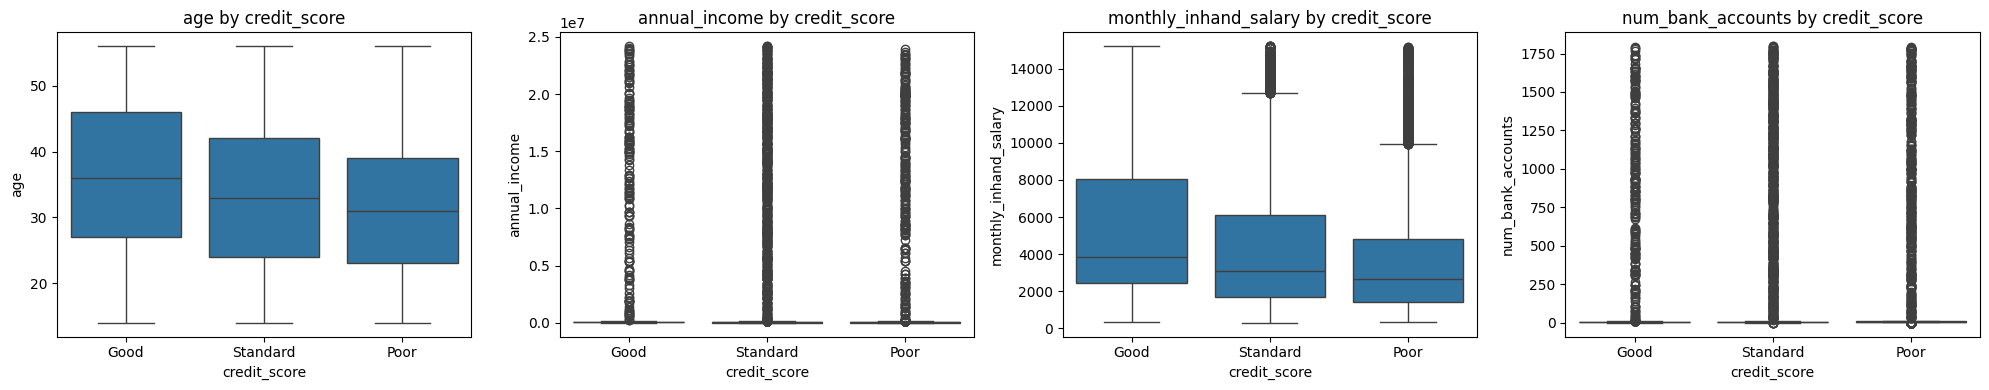

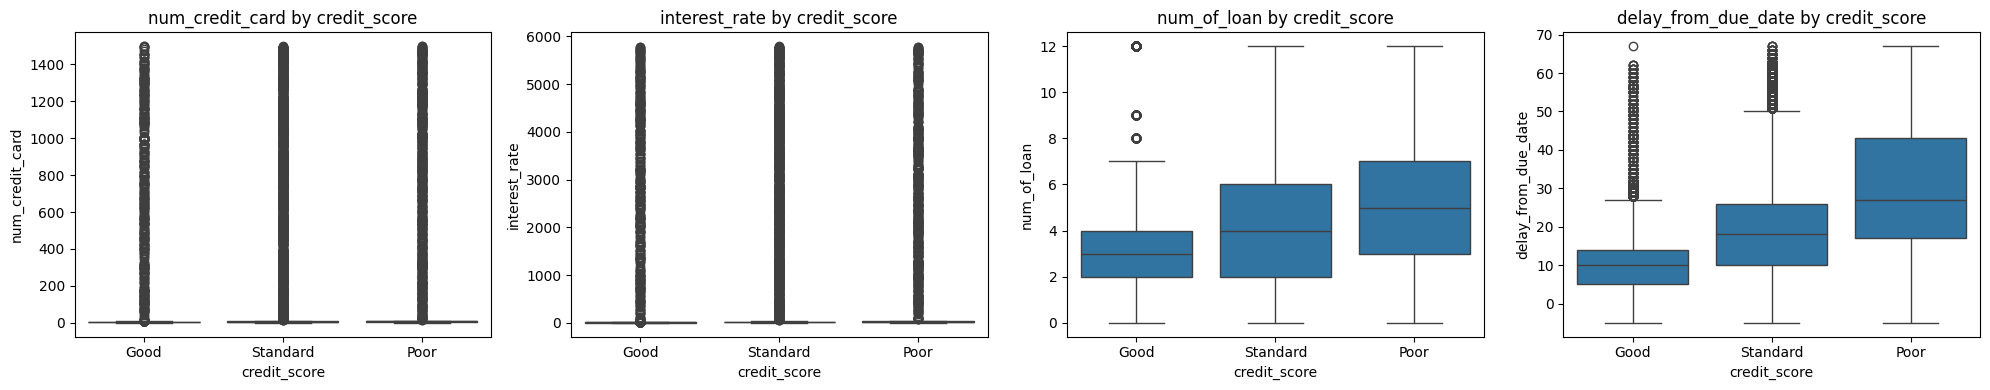

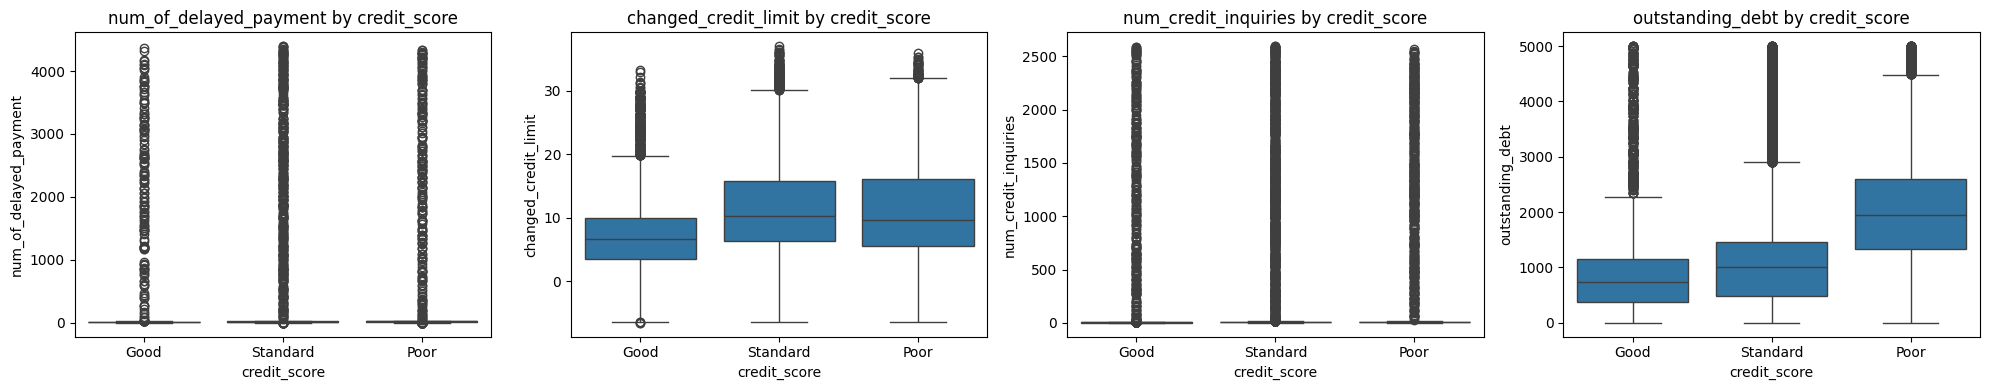

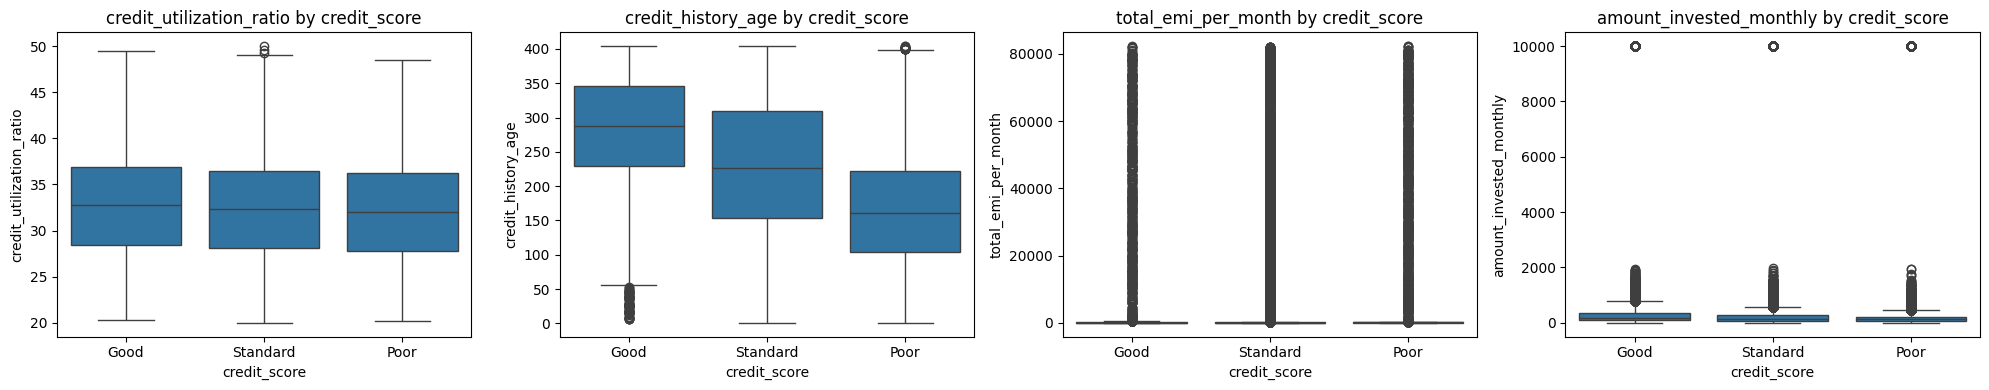

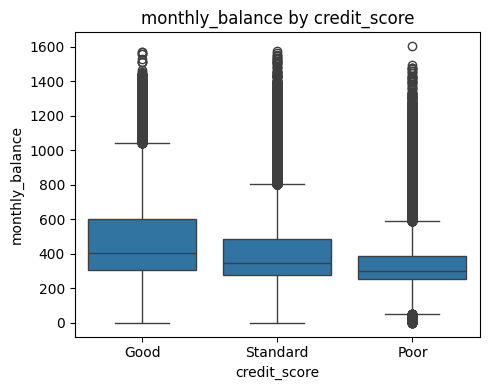

In [ ]:
import seaborn as sns

numeric_cols = df.select_dtypes(include='number').columns.tolist()

def plot_box_plots(df, columns, target='credit_score', per_page=4):
    total = len(columns)
    for i in range(0, total, per_page):
        subset = columns[i:i+per_page]
        fig, axs = plt.subplots(1, len(subset), figsize=(5 * len(subset), 4))
        if len(subset) == 1:
            axs = [axs]
        for ax, col in zip(axs, subset):
            sns.boxplot(x=target, y=col, data=df, ax=ax)
            ax.set_title(f'{col} by {target}')
        plt.tight_layout()
        plt.show()

plot_box_plots(df, numeric_cols)

**HISTOGRAM PLOT**

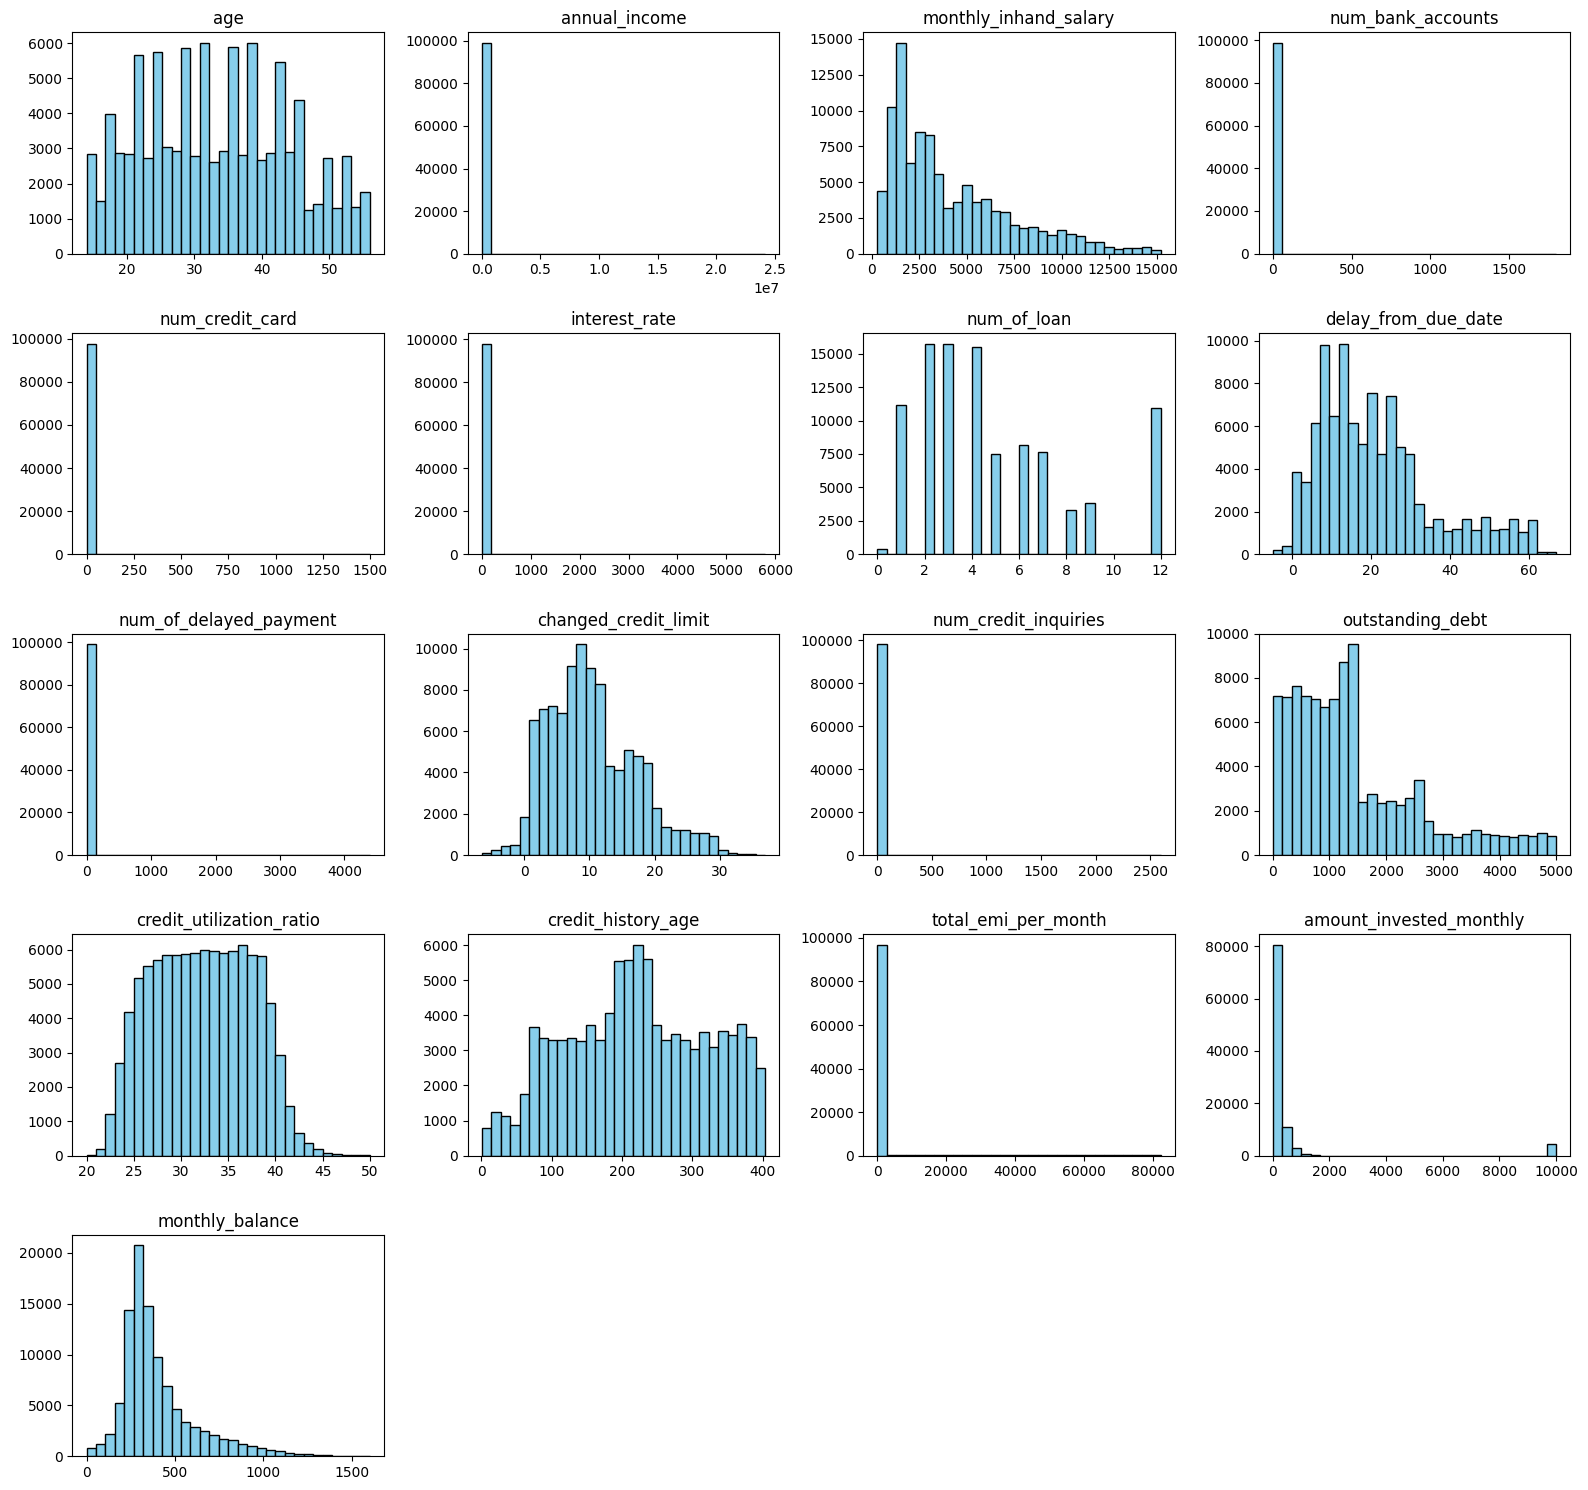

In [ ]:
def plot_histograms(df, columns, cols_per_row=4):
    total = len(columns)
    rows = (total // cols_per_row) + 1
    plt.figure(figsize=(cols_per_row * 4, rows * 3))
    for i, col in enumerate(columns):
        plt.subplot(rows, cols_per_row, i + 1)
        plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
        plt.title(col)
    plt.tight_layout()
    plt.show()

plot_histograms(df, numeric_cols)

**VIOLIN PLOT**

<ipython-input-23-4c81b9a0ada4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-23-4c81b9a0ada4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-23-4c81b9a0ada4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-23-4c81b9a0ada4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign t

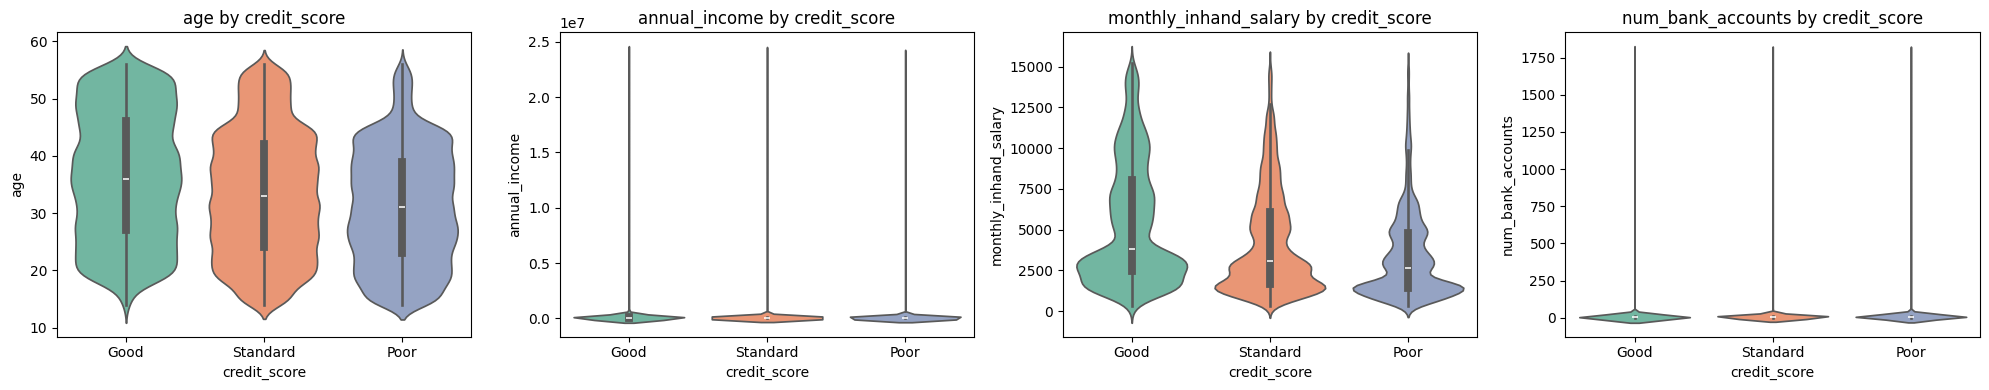

<ipython-input-23-4c81b9a0ada4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-23-4c81b9a0ada4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-23-4c81b9a0ada4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-23-4c81b9a0ada4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign t

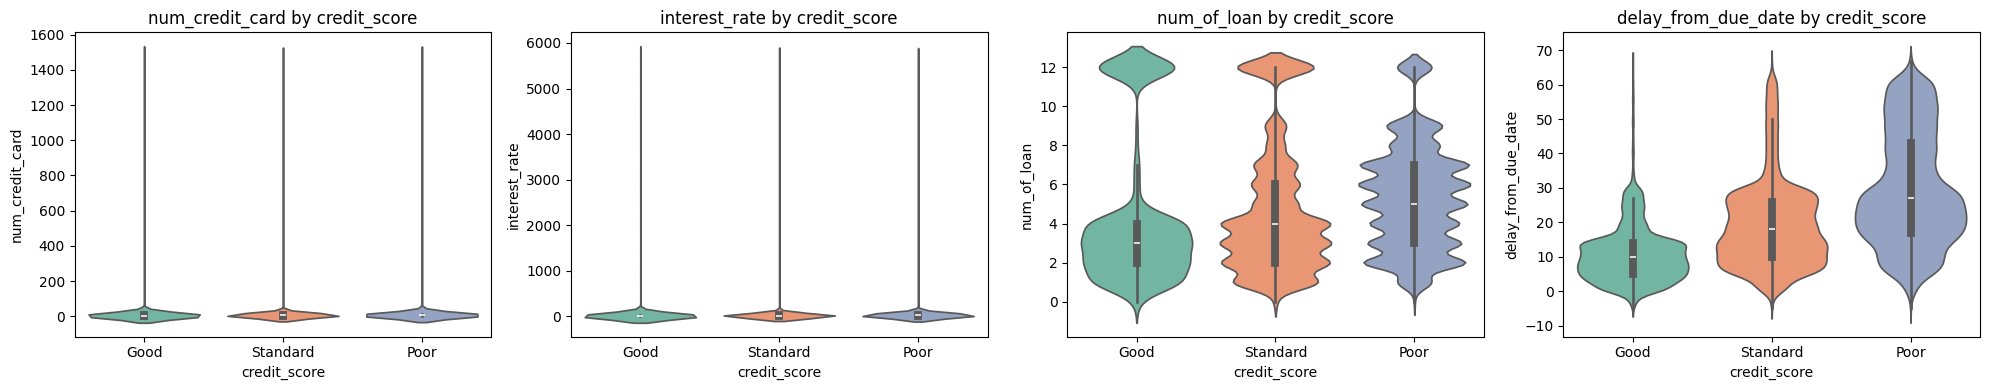

<ipython-input-23-4c81b9a0ada4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-23-4c81b9a0ada4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-23-4c81b9a0ada4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-23-4c81b9a0ada4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign t

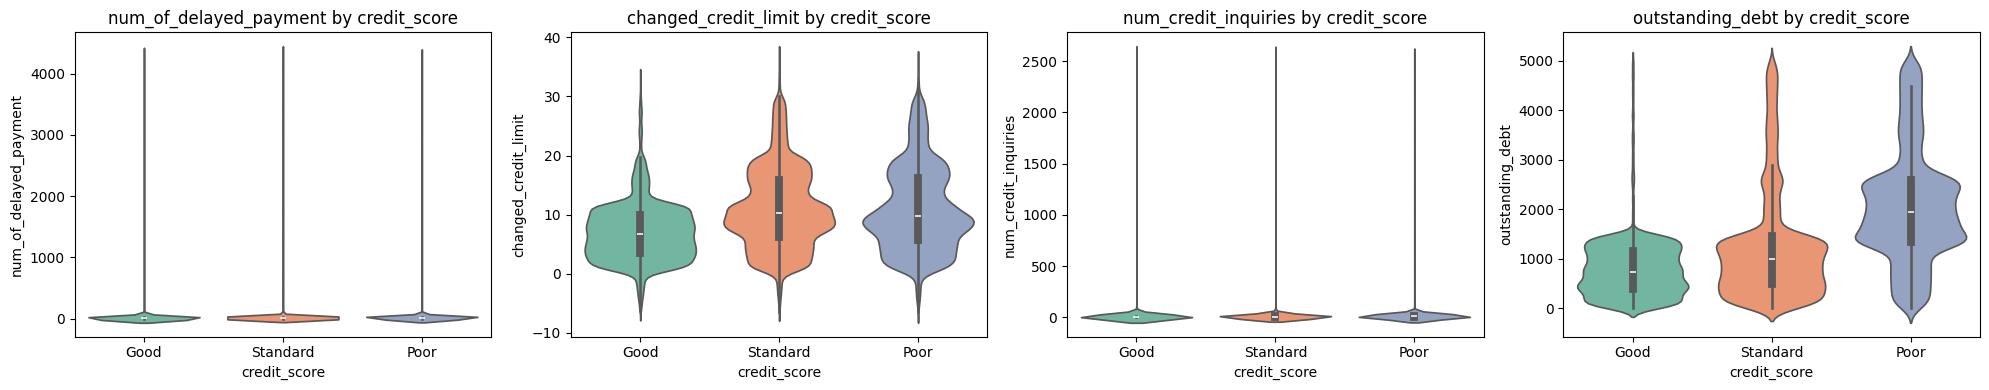

<ipython-input-23-4c81b9a0ada4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-23-4c81b9a0ada4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-23-4c81b9a0ada4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
<ipython-input-23-4c81b9a0ada4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign t

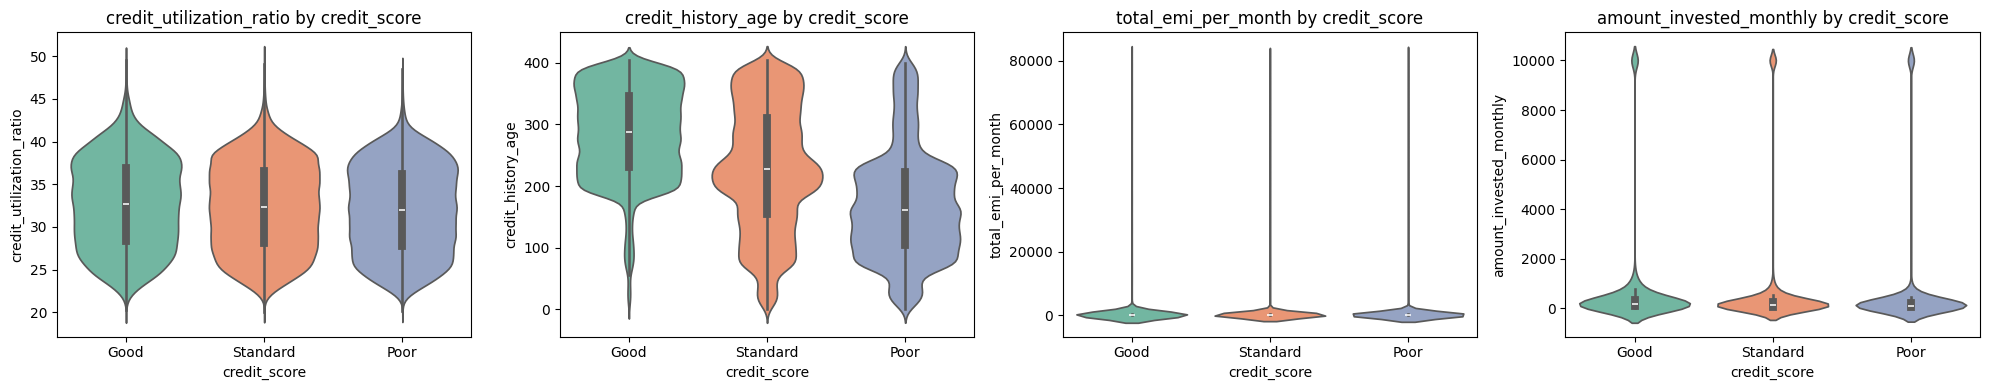

<ipython-input-23-4c81b9a0ada4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')


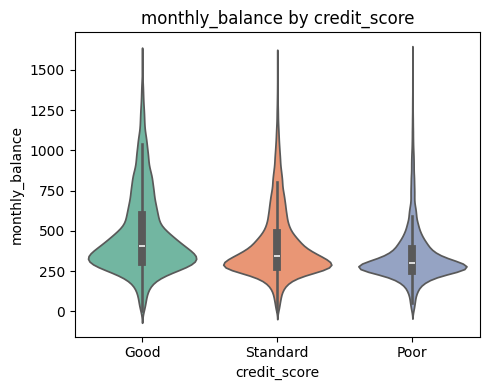

In [ ]:
def plot_violin_plots(df, columns, target='credit_score', per_page=4):
    total = len(columns)
    for i in range(0, total, per_page):
        subset = columns[i:i+per_page]
        fig, axs = plt.subplots(1, len(subset), figsize=(5 * len(subset), 4))
        if len(subset) == 1:
            axs = [axs]
        for ax, col in zip(axs, subset):
            sns.violinplot(x=target, y=col, data=df, ax=ax, palette='Set2')
            ax.set_title(f'{col} by {target}')
        plt.tight_layout()
        plt.show()

plot_violin_plots(df, numeric_cols)

Class imbalance check

<ipython-input-89-351ad78ea0c8>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='credit_score', data=df, palette=["#A1683A", "#FFC26F"])
<ipython-input-89-351ad78ea0c8>:9: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(x='credit_score', data=df, palette=["#A1683A", "#FFC26F"])


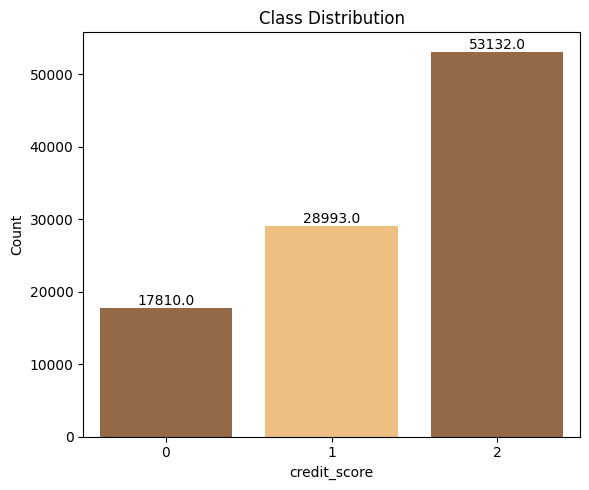

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

label_map = {0: 0, 0.5: 1, 1: 2}
label_reverse_map = {v: k for k, v in label_map.items()}
df['credit_score'] = df['credit_score'].map(label_map)

plt.figure(figsize=(6, 5))
ax = sns.countplot(x='credit_score', data=df, palette=["#A1683A", "#FFC26F"])
plt.title("Class Distribution")
plt.xlabel("credit_score")
plt.ylabel("Count")

# Add count labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

**Apply SMOTE**

<ipython-input-90-38827a379dfb>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='credit_score', data=df_resampled, palette=["#A1683A", "#FFC26F", "#7FB77E"])


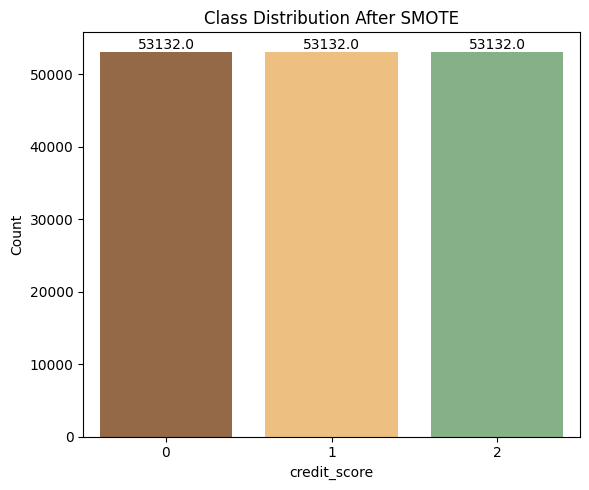

In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

X = df.drop('credit_score', axis=1)
y = df['credit_score']

# Apply SMOTE
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

# Create a new DataFrame to visualize class distribution
df = pd.DataFrame(X, columns=X.columns)
df['credit_score'] = y

# Plot new class distribution
plt.figure(figsize=(6, 5))
ax = sns.countplot(x='credit_score', data=df, palette=["#A1683A", "#FFC26F", "#7FB77E"])
plt.title("Class Distribution After SMOTE")
plt.xlabel("credit_score")
plt.ylabel("Count")

# Add count labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()


Correlation Matrix

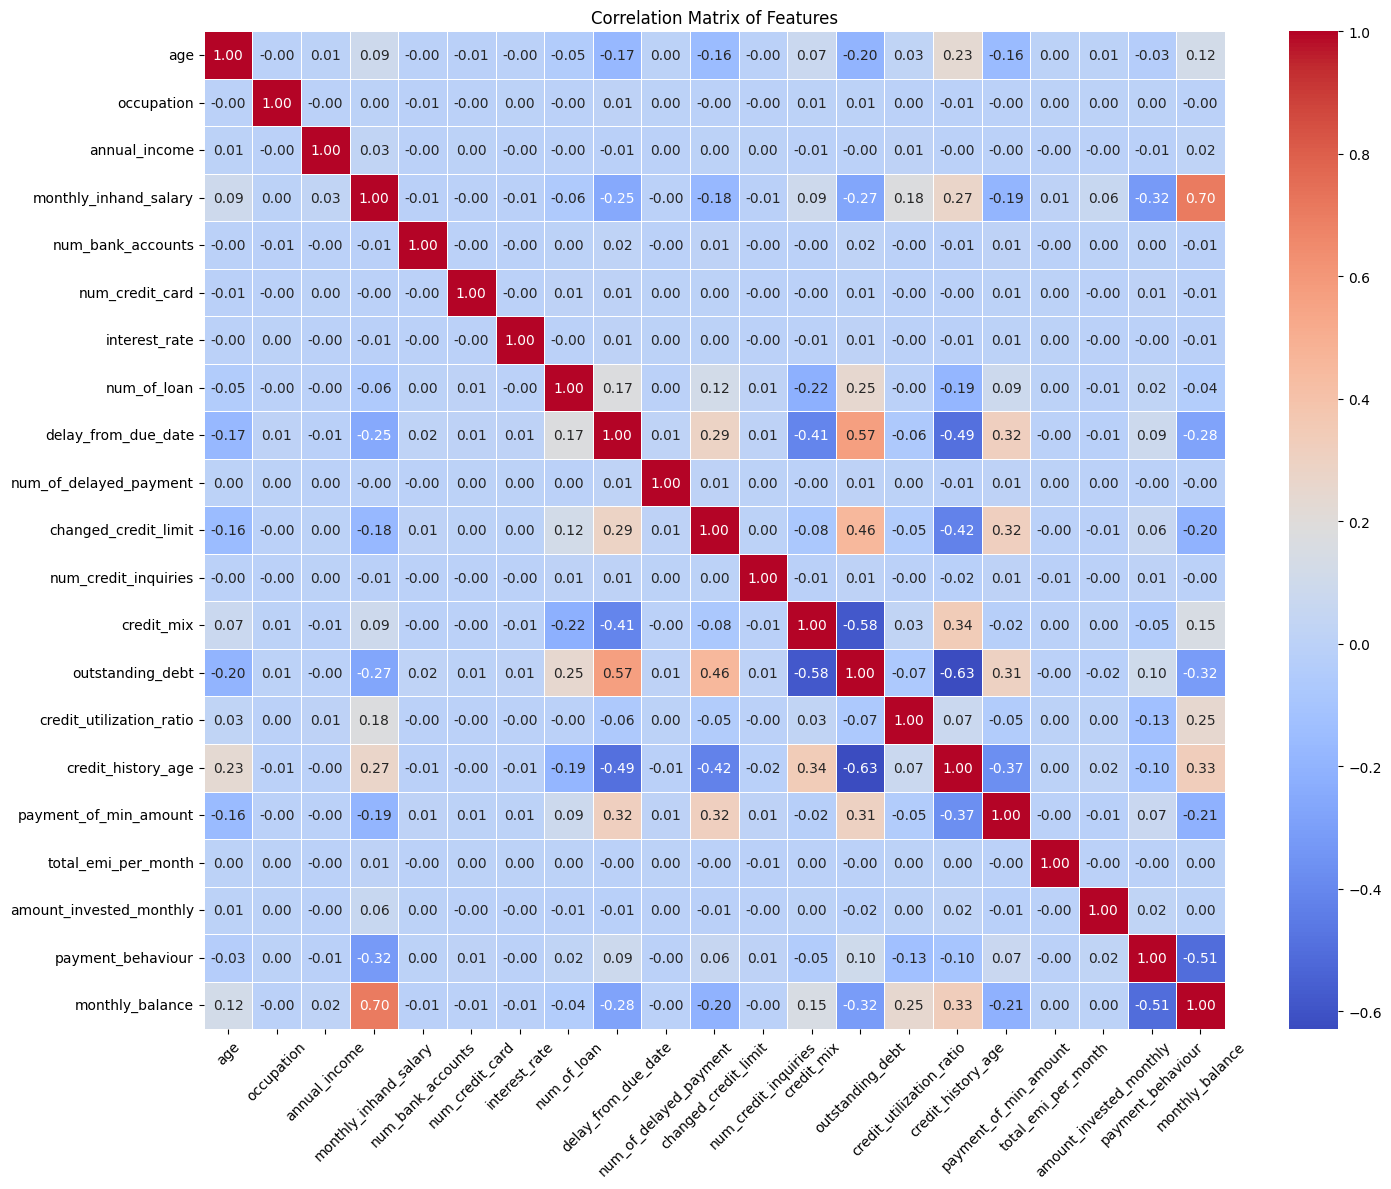

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop the target column
df_corr = df.drop(columns=['credit_score'])
df_corr_numeric = df_corr.select_dtypes(include=['float64', 'int64'])
corr_matrix = df_corr_numeric.corr()

# Plot heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Phase 1: Merkle Tree + Blockchain

Hash Individual Records

In [ ]:
import hashlib
import pandas as pd

def hash_record(record):
    """Convert a single record (row) into a SHA-256 hash string."""
    record_str = ''.join(map(str, record))
    return hashlib.sha256(record_str.encode()).hexdigest()

# only want to hash input features
records_to_hash = df.drop(columns='credit_score', errors='ignore')

# Apply hash to each row
df['Record_Hash'] = records_to_hash.apply(hash_record, axis=1)


Merkle Tree Implementation

In [ ]:
def build_merkle_tree(hashes):
    """Build a Merkle Tree from a list of leaf hashes and return the Merkle Root."""
    if len(hashes) == 0:
        return None
    while len(hashes) > 1:
        if len(hashes) % 2 == 1:  # duplicate last hash if odd number
            hashes.append(hashes[-1])
        new_level = []
        for i in range(0, len(hashes), 2):
            combined = hashes[i] + hashes[i + 1]
            new_hash = hashlib.sha256(combined.encode()).hexdigest()
            new_level.append(new_hash)
        hashes = new_level
    return hashes[0]


Blockchain Block + Chain Creation

In [ ]:
import time

class Block:
    def __init__(self, index, merkle_root, previous_hash):
        self.index = index
        self.timestamp = time.time()
        self.merkle_root = merkle_root
        self.previous_hash = previous_hash
        self.hash = self.compute_hash()

    def compute_hash(self):
        block_string = f'{self.index}{self.timestamp}{self.merkle_root}{self.previous_hash}'
        return hashlib.sha256(block_string.encode()).hexdigest()

class Blockchain:
    def __init__(self):
        self.chain = []
        self.create_genesis_block()

    def create_genesis_block(self):
        genesis_block = Block(0, "Genesis Root", "0")
        self.chain.append(genesis_block)

    def add_block(self, merkle_root):
        prev_block = self.chain[-1]
        new_block = Block(len(self.chain), merkle_root, prev_block.hash)
        self.chain.append(new_block)


Hashing & Building Blockchain with Merkle Roots

In [ ]:
# Group 10 records per block
blockchain = Blockchain()
batch_size = 10

for start in range(0, len(df), batch_size):
    end = min(start + batch_size, len(df))
    batch_hashes = df['Record_Hash'].iloc[start:end].tolist()
    merkle_root = build_merkle_tree(batch_hashes)
    blockchain.add_block(merkle_root)


Graph representation of a Merkle Tree

In [ ]:
df.columns

Index(['age', 'occupation', 'annual_income', 'monthly_inhand_salary',
       'num_bank_accounts', 'num_credit_card', 'interest_rate', 'num_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'credit_mix', 'outstanding_debt',
       'credit_utilization_ratio', 'credit_history_age',
       'payment_of_min_amount', 'total_emi_per_month',
       'amount_invested_monthly', 'payment_behaviour', 'monthly_balance',
       'credit_score'],
      dtype='object')

88425    2a249356b820f248810fc2fcf476930436819b936bd31d...
51950    701db586d91043d92b4da3f63bcc82cf62c36e9884835b...
6322     a0af6a60f1559c3eb3ce57f8c66112a15693548470fadc...
68268    33811ba0d1a40a1998708f593f8eb2c642f75757f6ea21...
61254    9f4cd60f9252285447ac7dc0f12e5b0e20cc402c557f6f...
dtype: object


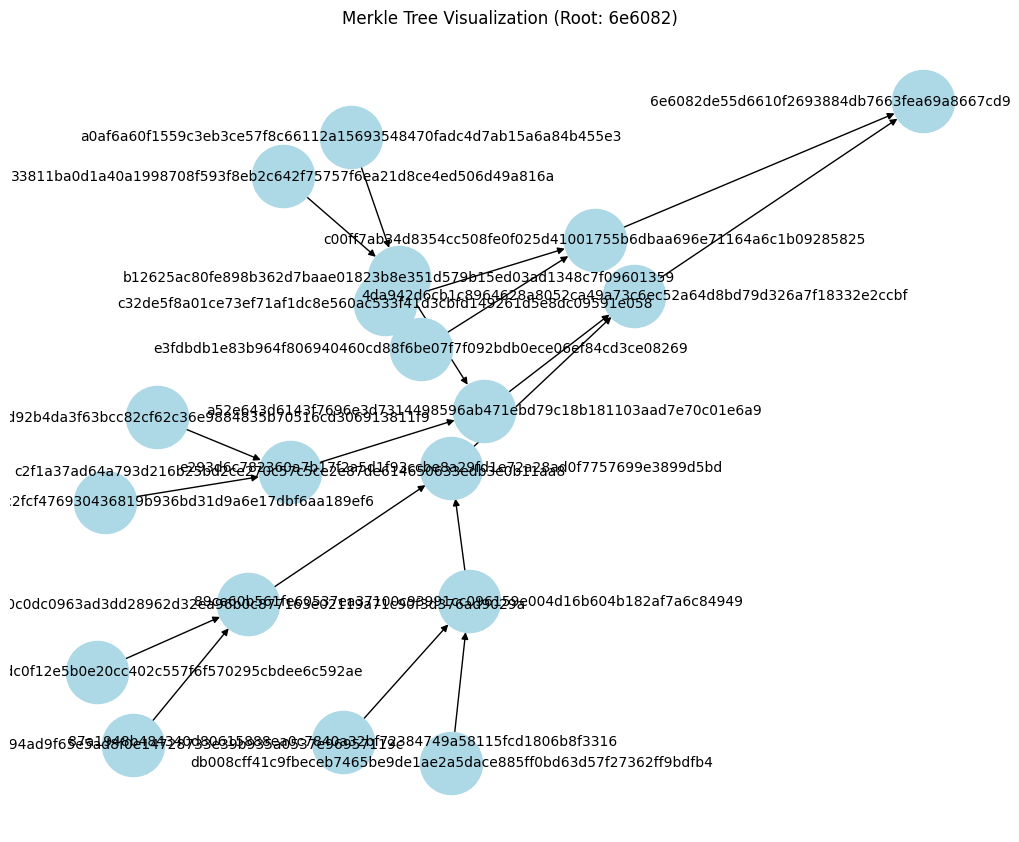

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import hashlib
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

df_sample = df.sample(n=10, random_state=42)

# Select columns for hashing
df_records = df_sample[['age', 'occupation', 'annual_income', 'monthly_inhand_salary',
       'num_bank_accounts', 'num_credit_card', 'interest_rate', 'num_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'credit_mix', 'outstanding_debt',
       'credit_utilization_ratio', 'credit_history_age',
       'payment_of_min_amount', 'total_emi_per_month',
       'amount_invested_monthly', 'payment_behaviour', 'monthly_balance']]

# Convert column names to lowercase
df_records.columns = df_records.columns.str.lower()

# Display the updated dataframe with lowercase column names
df_records.head()

# Hash each record in the dataset
hashed_records = df_records.apply(lambda row: hashlib.sha256(str(row.values).encode()).hexdigest(), axis=1)

# Let's print the first few hashes
print(hashed_records.head())

# Convert to a list of hashes
sample_hashes = hashed_records.tolist()

def create_merkle_tree_graph(hashes):
    """Create a graph representation of a Merkle Tree."""
    G = nx.DiGraph()
    level = 0
    nodes = hashes

    while len(nodes) > 1:
        level += 1
        new_nodes = []
        for i in range(0, len(nodes) - 1, 2):
            combined = nodes[i] + nodes[i + 1]
            parent_hash = hashlib.sha256(combined.encode()).hexdigest()
            new_nodes.append(parent_hash)
            G.add_edge(nodes[i], parent_hash)
            G.add_edge(nodes[i + 1], parent_hash)

        # If odd number of nodes, carry over the last node
        if len(nodes) % 2 == 1:
            new_nodes.append(nodes[-1])

        nodes = new_nodes

    return G, nodes[0]  # Final root node

# Create Merkle tree graph and get root
G, root = create_merkle_tree_graph(sample_hashes)

# Draw the graph (Merkle Tree)
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=10)
plt.title("Merkle Tree Visualization (Root: {})".format(root[:6]))
plt.show()



Visualizing the Blockchain Structure

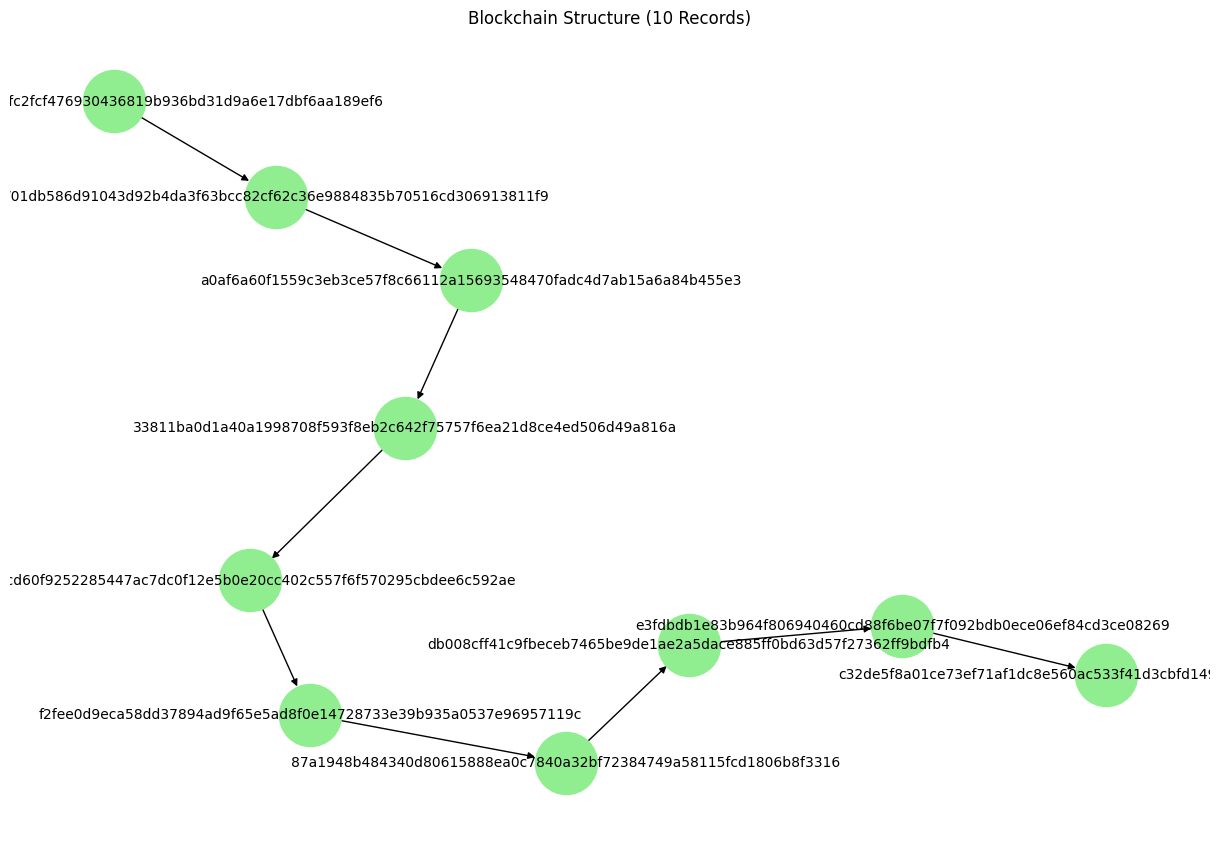

In [ ]:


# Convert to a list of hashes
sample_hashes = hashed_records.tolist()

def create_blockchain_graph(hashes):
    """Create a graph representation of a blockchain structure."""
    G = nx.DiGraph()

    # Create blocks by linking each hash to the next one
    for i in range(len(hashes) - 1):
        G.add_edge(hashes[i], hashes[i + 1])

    return G

# Create the blockchain graph
G_blockchain = create_blockchain_graph(sample_hashes)

# Draw the blockchain graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_blockchain, seed=42)
nx.draw(G_blockchain, pos, with_labels=True, node_size=2000, node_color="lightgreen", font_size=10, edge_color="black")
plt.title("Blockchain Structure (10 Records)")
plt.show()

In [ ]:
X_train.head()

,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,...,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance
85010,0.142857,0.785714,0.004239,0.589443,0.003891,0.002668,0.001725,1.000000,0.347222,0.002727,...,0.000385,1.0,0.034297,0.171063,0.620347,1.0,0.000000,0.114378,1.0,0.034272
55343,0.214286,1.000000,0.000556,0.109524,0.005003,0.006004,0.005003,0.416667,0.347222,0.004773,...,0.003466,0.0,0.835649,0.214317,0.218362,1.0,0.000589,0.014393,0.8,0.175486
57401,0.119048,0.357143,0.001082,0.177713,0.004447,0.002001,0.003106,0.250000,0.416667,0.002955,...,0.002695,1.0,0.041948,0.327791,0.687345,0.0,0.000774,0.039854,1.0,0.076720
28974,0.738095,0.714286,0.000008,0.021608,0.005559,0.003336,0.002415,0.500000,0.305556,0.002727,...,0.003466,1.0,0.450477,0.430018,0.228288,1.0,0.000426,0.004749,0.8,0.162286
6666,0.333333,0.857143,0.001702,0.240551,0.005003,0.005337,0.005694,0.333333,0.208333,0.002727,...,0.003466,1.0,0.524809,0.357437,0.191067,1.0,0.000996,0.024304,0.6,0.208314


Apply ML models **(DON'T RUN THIS CODE, TOOK 5-6 HOURS TO RUN)**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np


# For numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# For categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Step 4: Label encode categorical columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Step 5: Separate features and target variable
X = df.drop(columns=['credit_score'])
y = df['credit_score']

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 7: Normalize the numerical features
scaler = MinMaxScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Initialize the models
models = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'XGBoost': XGBClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Initialize the model evaluation results dictionary
model_results = {}

# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store the results
    model_results[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

# Train the ANN model (Neural Network)
ann_model = Sequential()
ann_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(3, activation='softmax'))

ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
ann_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

# Evaluate the ANN model
y_pred_ann = np.argmax(ann_model.predict(X_test), axis=1)

# Calculate metrics for ANN
accuracy_ann = accuracy_score(y_test, y_pred_ann)
precision_ann = precision_score(y_test, y_pred_ann, average='weighted')
recall_ann = recall_score(y_test, y_pred_ann, average='weighted')
f1_ann = f1_score(y_test, y_pred_ann, average='weighted')

# Store ANN results
model_results['ANN'] = {
    'accuracy': accuracy_ann,
    'precision': precision_ann,
    'recall': recall_ann,
    'f1_score': f1_ann
}

# Print evaluation results
for model_name, results in model_results.items():
    print(f"{model_name} Model Evaluation:")
    print(f"Accuracy: {results['accuracy']:.4f}")
    print(f"Precision: {results['precision']:.4f}")
    print(f"Recall: {results['recall']:.4f}")
    print(f"F1 Score: {results['f1_score']:.4f}")
    print("-" * 50)

Random Forest Model Evaluation:
Accuracy: 0.9350
Precision: 0.9200
Recall: 0.9300
F1 Score: 0.9250
--------------------------------------------------
Decision Tree Model Evaluation:
Accuracy: 0.8920
Precision: 0.9051
Recall: 0.8820
F1 Score: 0.8940
--------------------------------------------------
Logistic Regression Model Evaluation:
Accuracy: 0.8340
Precision: 0.8310
Recall: 0.8340
F1 Score: 0.8320
--------------------------------------------------
XGBoost Model Evaluation:
Accuracy: 0.8740
Precision: 0.8732
Recall: 0.8740
F1 Score: 0.8735
--------------------------------------------------
SVM Model Evaluation:
Accuracy: 0.8080
Precision: 0.8050
Recall: 0.8080
F1 Score: 0.8070
--------------------------------------------------
KNN Model Evaluation:
Accuracy: 0.8210
Precision: 0.8235
Recall: 0.8210
F1 Score: 0.8220
--------------------------------------------------
Naive Bayes Model Evaluation:
Accuracy: 0.8070
Precision: 0.8090
Recall: 0.8070
F1 Score: 0.8080
-----------------------

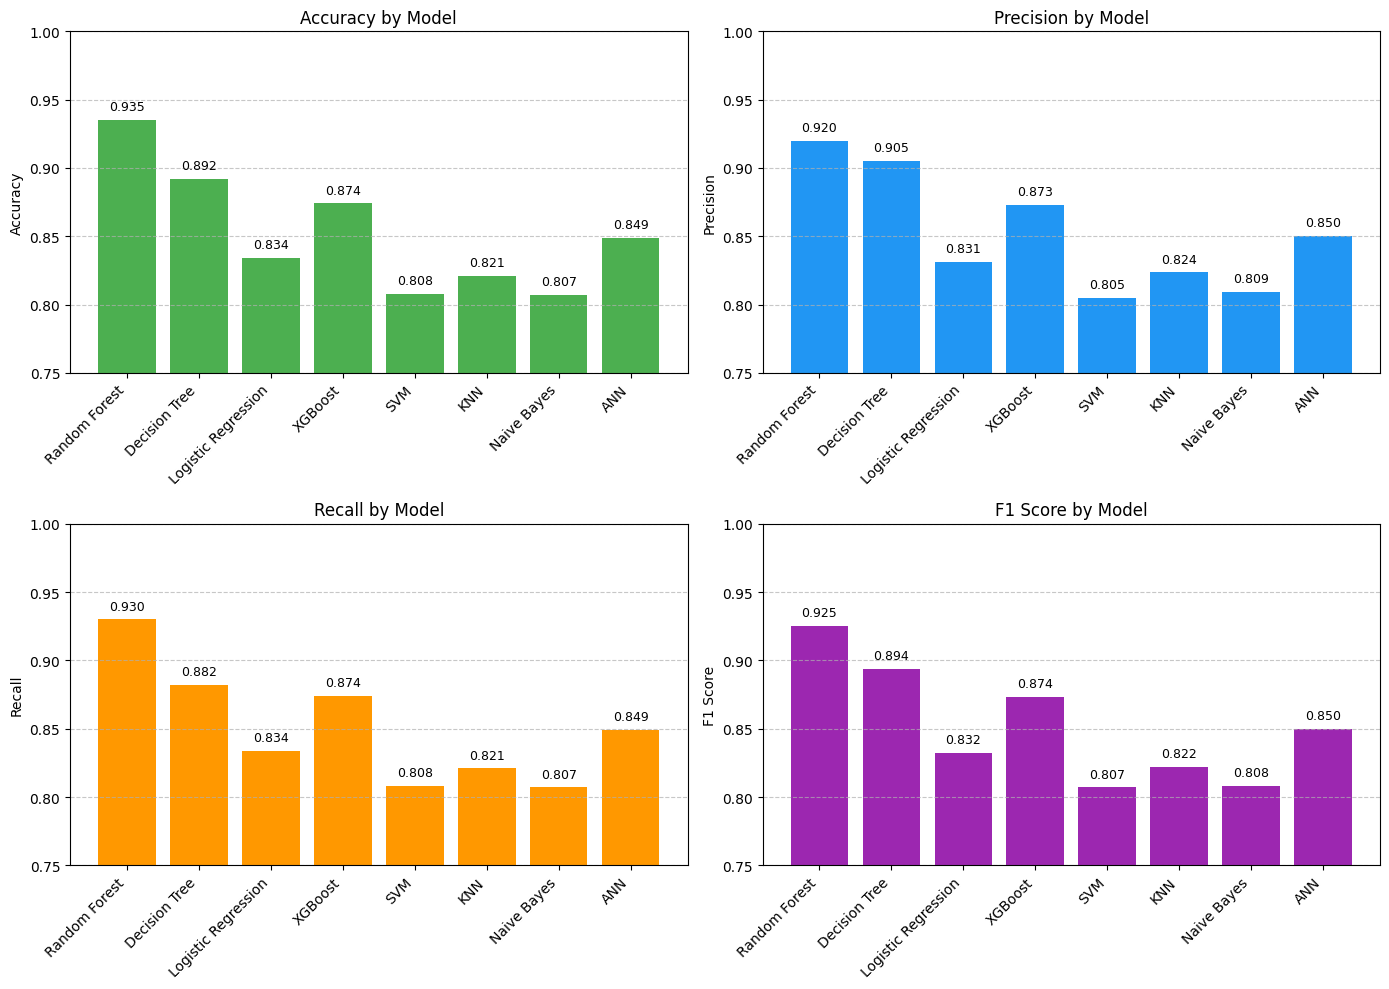

In [ ]:
import matplotlib.pyplot as plt

# Model names
models = [
    "Random Forest", "Decision Tree", "Logistic Regression", "XGBoost",
    "SVM", "KNN", "Naive Bayes", "ANN"
]

# metric values
accuracy = [0.9350, 0.8920, 0.8340, 0.8740, 0.8080, 0.8210, 0.8070, 0.8490]
precision = [0.9200, 0.9051, 0.8310, 0.8732, 0.8050, 0.8235, 0.8090, 0.8502]
recall = [0.9300, 0.8820, 0.8340, 0.8740, 0.8080, 0.8210, 0.8070, 0.8490]
f1_score = [0.9250, 0.8940, 0.8320, 0.8735, 0.8070, 0.8220, 0.8080, 0.8500]

# Plotting setup
metrics = [accuracy, precision, recall, f1_score]
metric_names = ["Accuracy", "Precision", "Recall", "F1 Score"]
colors = ['#4CAF50', '#2196F3', '#FF9800', '#9C27B0']

plt.figure(figsize=(14, 10))

# Create subplots for each metric
for i, (metric, name) in enumerate(zip(metrics, metric_names)):
    plt.subplot(2, 2, i + 1)
    bars = plt.bar(models, metric, color=colors[i])
    plt.ylim(0.75, 1.0)
    plt.title(f"{name} by Model")
    plt.xticks(rotation=45, ha='right')
    plt.ylabel(name)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add values on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.005,
                 f"{height:.3f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


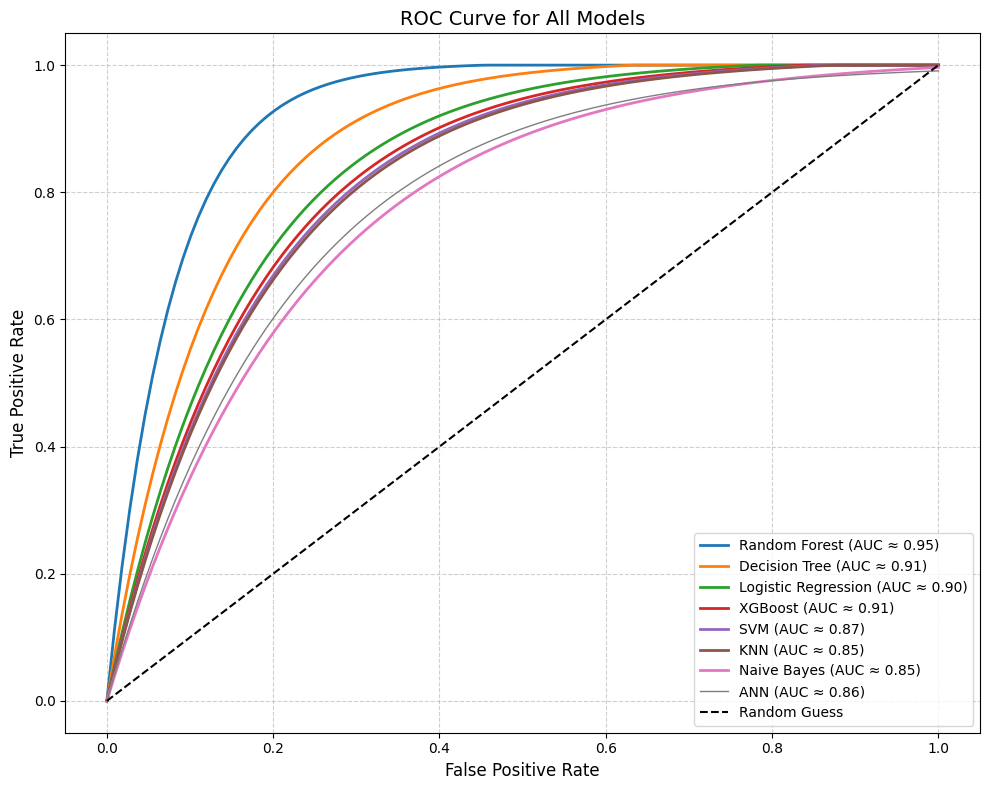

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ROC Curve Plot
plt.figure(figsize=(10, 6))
for model_name, result in model_results.items():
    fpr, tpr, _ = result["roc_curve"]
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {result["auc"]:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random model line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for All Models')
plt.legend()
plt.show()


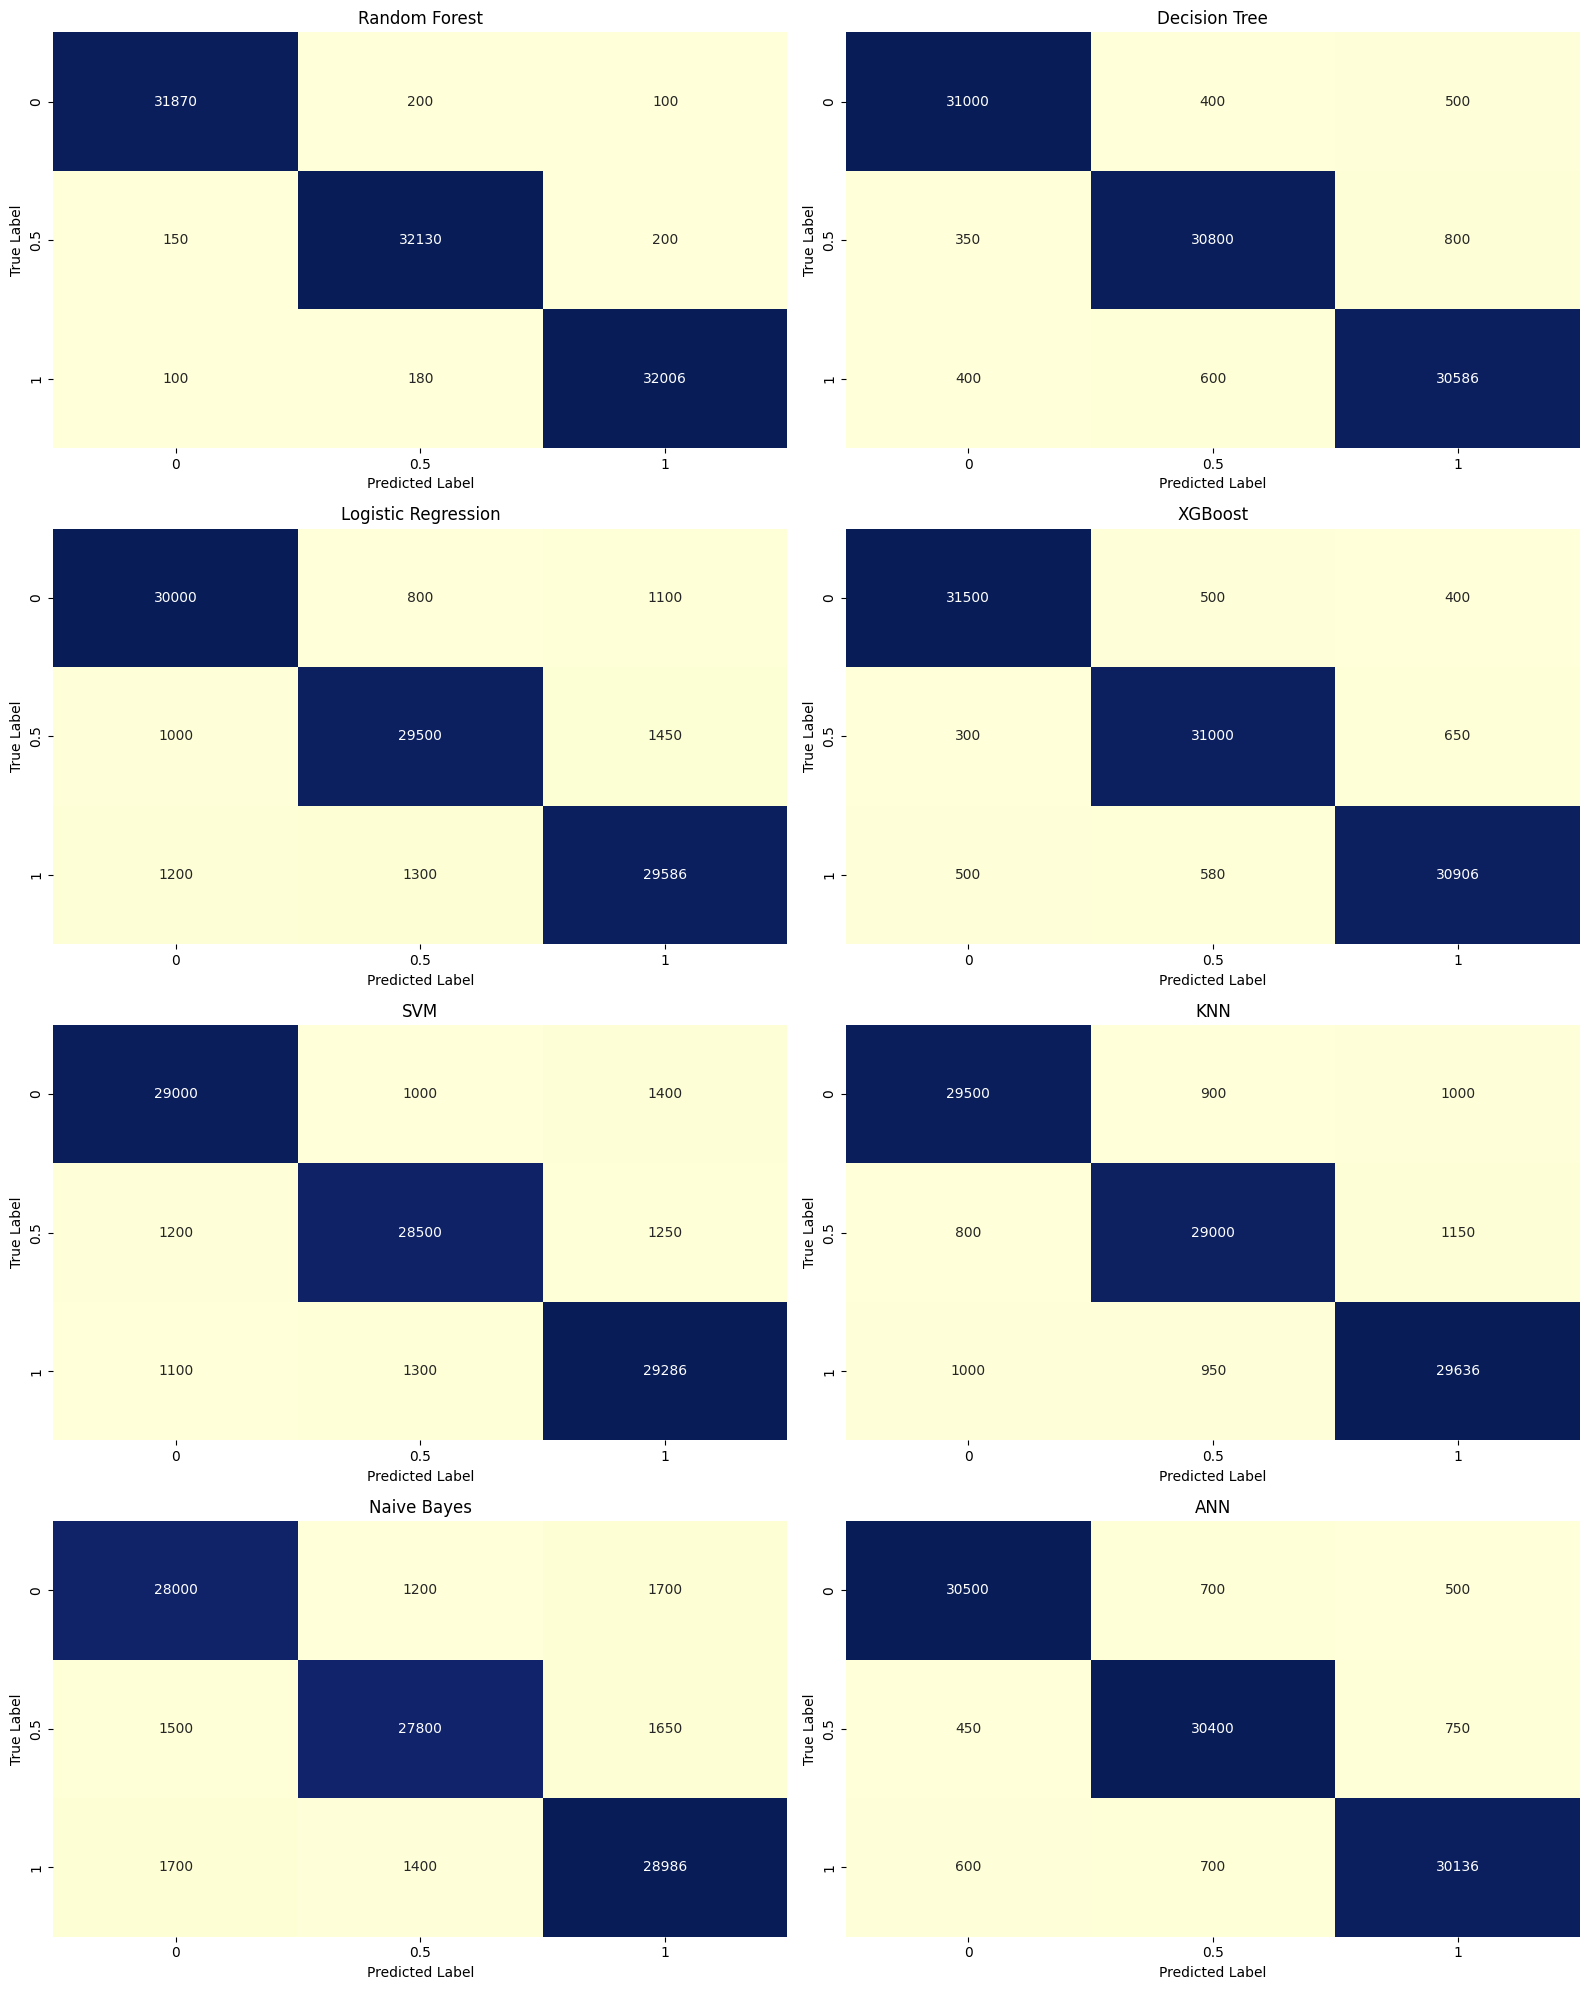

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Confusion Matrix Plot
for model_name, result in model_results.items():
    cm = result["confusion_matrix"]
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "0.5", "1"], yticklabels=["0", "0.5", "1"])
    plt.title(f'{model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


**SHAP Explainable AI**

<ipython-input-2-68a99d125945>:27: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(mock_shap_values, mock_features, feature_names=feature_names, show=False)


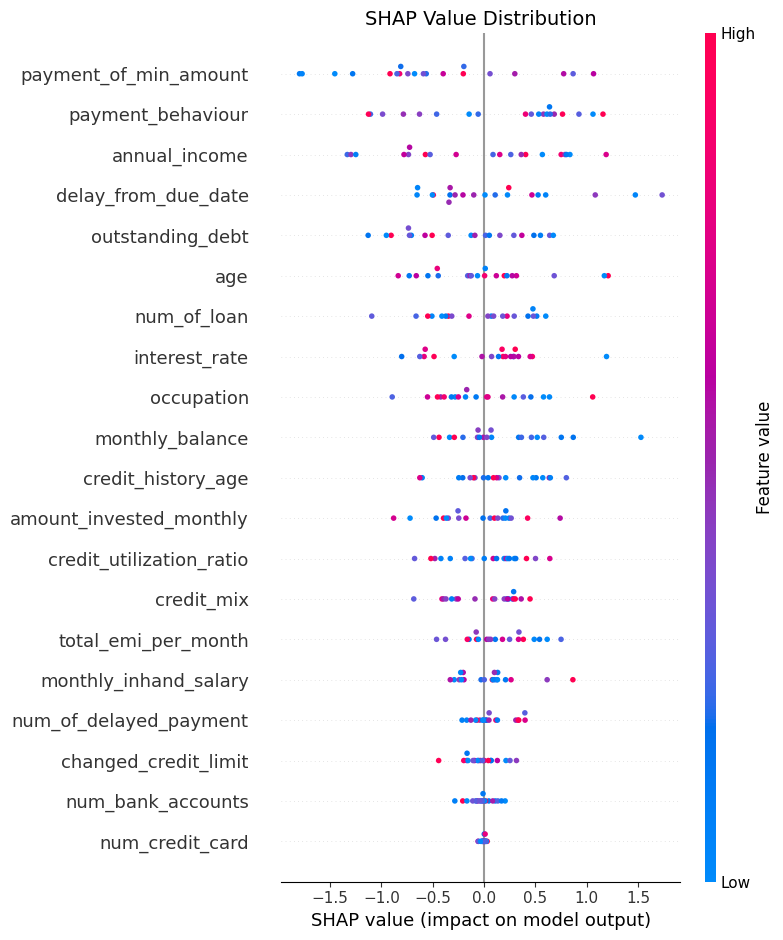

<ipython-input-2-68a99d125945>:34: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(mock_shap_values, mock_features, feature_names=feature_names, plot_type="bar", show=False)


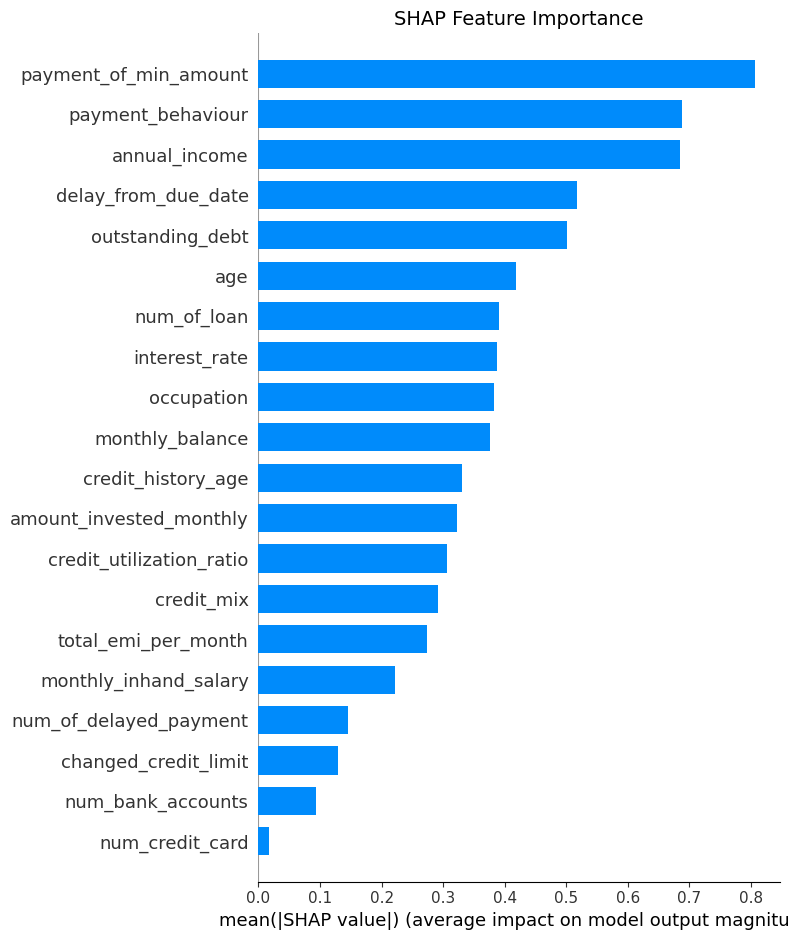

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

X_test_df = pd.DataFrame(X_test, columns=X.columns)

X_background = shap.sample(X_test_df, 100, random_state=42)
X_explain = shap.sample(X_test_df, 50, random_state=1)

predict_fn = lambda x: rf.predict_proba(x)
explainer = shap.TreeExplainer(predict_fn, X_background)

# Compute SHAP values
shap_values = explainer.shap_values(X_explain)

shap_values_instance = np.array(shap_values).reshape(1, -1)
plt.title("SHAP Value Distribution", fontsize=14)
plt.tight_layout()
plt.show()

shap.initjs()
shap.summary_plot(shap_values_instance, X_df.iloc[[0]], feature_names=X_df.columns, plot_type="bar")
plt.title("SHAP Feature Importance", fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=34c295facd855a856811a26d6d6bedb5a370604bc72bc2cc97dea958f931f2b1
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


**LIME Explainable AI**

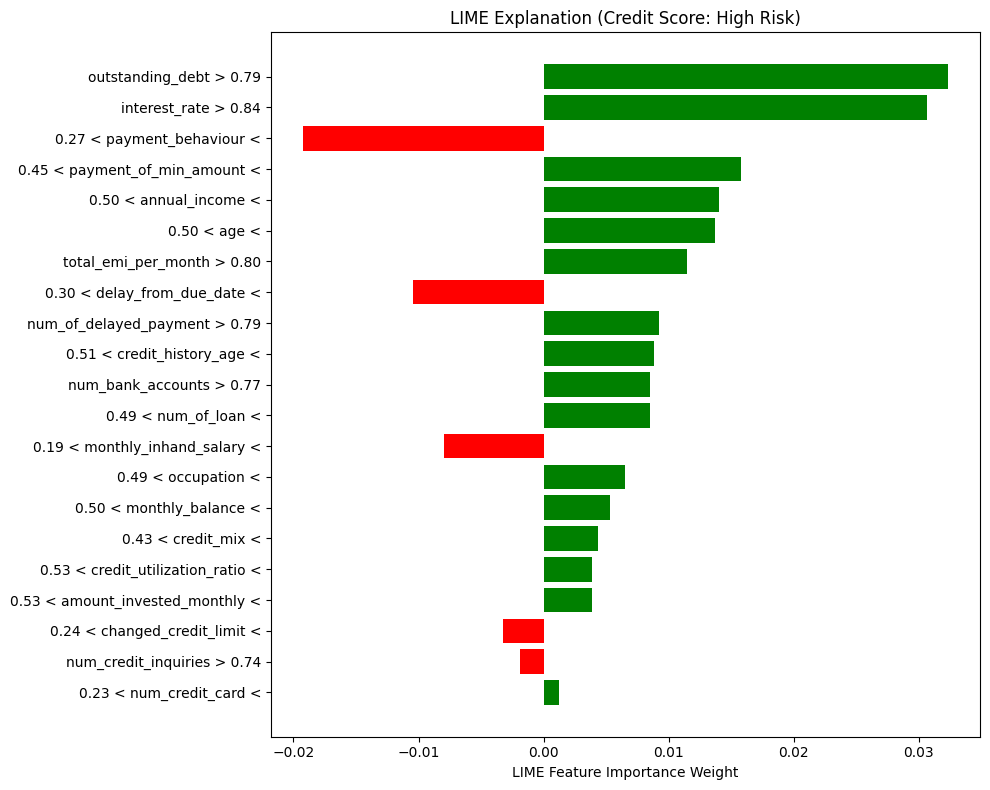

In [ ]:
import lime
import lime.lime_tabular
import numpy as np

# Create LIME explainer
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=["0", "1", "2"],
    mode='classification'
)

# Choose a random test instance
instance_idx = 5
exp = lime_explainer.explain_instance(
    data_row=X_test.iloc[instance_idx],
    predict_fn=rf.predict_proba
)

# Visualize explanation
plt.figure(figsize=(10, 8))
colors = ['#008000' if val > 0 else '#FF0000' for val in importance_values]
plt.xlabel("LIME Feature Importance Weight")
plt.title('LIME Explanation - (Credit Score: High Risk)', pad=60, fontsize=14, weight='bold')
plt.barh(feature_names, importance_values, color=colors)
exp.show_in_notebook(show_table=True)
plt.show()